## Entrenamiento con redes neuronales

---

### Con limpieza específica basada en el analisis preliminar

In [1]:
%run "Funciones.py"
%matplotlib inline

In [2]:
# Importo los datos como dataframe de pandas
real = pd.read_csv("Data/True.csv")
fake = pd.read_csv("Data/Fake.csv")

### Aplicamos alguna limpieza previa

Difference in Text

Real news seems to have source of publication which is not present in fake news set

Looking at the data:

*most of text contains reuters information such as "WASHINGTON (Reuters)"

*Some text are tweets from Twitter

*Few text do not contain any publication info

In [3]:
# First Creating list of index that do not have publication part
unknown_publishers = []
for index,row in enumerate(real.text.values):
    try:
        record = row.split(" -", maxsplit=1)
        #if no text part is present, following will give error
        record[1]
        #if len of piblication part is greater than 260
        #following will give error, ensuring no text having "-" in between is counted
        assert(len(record[0]) < 260)
    except:
        unknown_publishers.append(index)

In [4]:
# Thus we have list of indices where publisher is not mentioned
# lets check
real.iloc[unknown_publishers].text
# true, they do not have text like "WASHINGTON (Reuters)"

3488     The White House on Wednesday disclosed a group...
4358     Neil Gorsuch, President Donald Trump’s appoint...
4465     WASHINGTON The clock began running out this we...
5784     Federal appeals court judge Neil Gorsuch, the ...
6660     Republican members of Congress are complaining...
6823     Over the course of the U.S. presidential campa...
7922     After going through a week reminiscent of Napo...
8194     The following timeline charts the origin and s...
8195     Global health officials are racing to better u...
8247     U.S. President Barack Obama visited a street m...
8465     ALGONAC, MICH.—Parker Fox drifted out of the D...
8481     Global health officials are racing to better u...
8482     The following timeline charts the origin and s...
8505     Global health officials are racing to better u...
8506     The following timeline charts the origin and s...
8771     In a speech weighted with America’s complicate...
8970                                                    

In [5]:
# Seperating Publication info, from actual text
publisher = []
tmp_text = []
for index,row in enumerate(real.text.values):
    if index in unknown_publishers:
        #Add unknown of publisher not mentioned
        tmp_text.append(row)
        
        publisher.append("Unknown")
        continue
    record = row.split(" -", maxsplit=1)
    publisher.append(record[0])
    tmp_text.append(record[1])

In [6]:
# Replace existing text column with new text
# add seperate column for publication info
# real["publisher"] = publisher
real["text"] = tmp_text

del publisher, tmp_text, record, unknown_publishers

In [7]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,politicsNews,"December 29, 2017"


In [8]:
# dropping this record
real = real.drop(8970, axis=0)

#### Hasta aca se elimino la agencia que solo esta presente en las noticias reales

In [9]:
# Mezclamos los 2 dataframes y los ramdomisamos el orden
news = real.append(fake, ignore_index=True)
news = shuffle(news)
news

,title,text,subject,date
4093,Trump's push to fund wall may be delayed as go...,U.S. President Donald Trump indicated an open...,politicsNews,"April 24, 2017"
2077,Bruising debate brings a reluctant Trump aroun...,U.S. President Donald Trump came around to th...,politicsNews,"August 22, 2017"
43722,THIS YEAR: Let’s Make Christmas Great Again…,"This year, let s try something a little differ...",US_News,"December 25, 2016"
6525,Schumer on Republican Obamacare repeal: it's t...,U.S. Senate Democratic leader Chuck Schumer s...,politicsNews,"January 4, 2017"
2955,Senate bill would cut Medicaid spending 35 per...,Spending on the Medicaid healthcare program f...,politicsNews,"June 29, 2017"
...,...,...,...,...
2617,The Sean Spicer Show: White House spokesman's ...,Sean Spicer burst onto the public stage six m...,politicsNews,"July 21, 2017"
27128,Trump’s Flip-Flop: Now He’s Complaining That ...,Donald Trump appears to be backing off on his ...,News,"June 26, 2016"
22676,London Mayor Demands UK Cancel Trump’s State ...,"Trump picked a petty, embarrassing fight with ...",News,"June 5, 2017"
31963,UPDATE: DEM OFFICIAL CAUGHT ON TAPE: “I’m Glad...,THE UPDATE TO THIS NEBRASKA DEMOCRATIC PARTY O...,politics,"Jun 23, 2017"


[Text(0, 0, 'politicsNews'),
 Text(1, 0, 'US_News'),
 Text(2, 0, 'News'),
 Text(3, 0, 'Government News'),
 Text(4, 0, 'worldnews'),
 Text(5, 0, 'politics'),
 Text(6, 0, 'left-news'),
 Text(7, 0, 'Middle-east')]

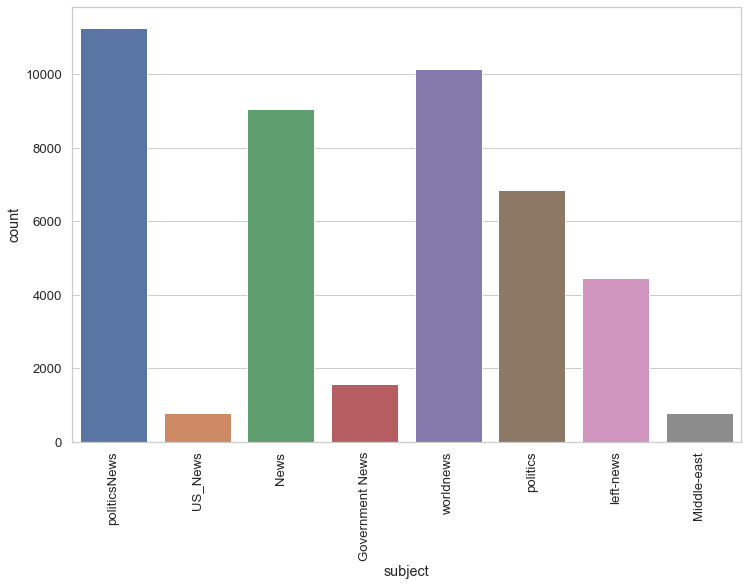

In [10]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", data = news)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [11]:
#Combinamos columnas de texto
news['text'] = news['title'] + " " + news['text']
news.drop(['title', 'date'], axis=1, inplace=True)
news.sample(5)

,text,subject
18751,"Cuts hurt Mexico quake response, outlook ahead...",worldnews
43323,NO TOILET PAPER?! SOCIALISM IS IN ITS FINAL ST...,left-news
38677,$110K STOLEN FROM ‘At Risk Kids’ Fund By DC Ci...,Government News
21058,Libyan forces attack Islamic State near former...,worldnews
29293,You Won’t Believe Who Scalia Spent His Final ...,News


In [12]:
news.shape

(44897, 2)

### Codificamos etiquetas

In [13]:
le = preprocessing.LabelEncoder()
news['subject'] = le.fit_transform(news['subject'])
news['subject'].value_counts()

6    11271
7    10145
2     9050
5     6841
4     4459
0     1570
3      783
1      778
Name: subject, dtype: int64

### Continuamos proceso de limpieza

In [14]:
news['text']=news['text'].apply(denoise_text)

In [15]:
news.sample(3)

,text,subject
5973,"britain becoming u.s. vassal state, says frenc...",6
13188,bosnia must make reforms eu window could close...,7
8324,senators press mylan 'exorbitantly expensive' ...,6


Hasta aqui se hizo limpieza general de formato

---

### Separación de sets para entrenamiento, testeo

In [16]:
train, test = train_test_split(news, test_size=0.3, random_state=42, stratify=news['subject'])

In [17]:
vocabulario_max = 20000
filtrar = "!#$%&()*+,-./':;<=>?@[\\]^_`{|}~\t\n\'"
tokenizer = Tokenizer(num_words=vocabulario_max, filters=filtrar, lower=True, split=" ")
tokenizer.fit_on_texts(train.text)
word_index = tokenizer.word_index

In [18]:
train_matrix = tokenizer.texts_to_matrix(np.array(train.text))
test_matrix = tokenizer.texts_to_matrix(np.array(test.text))

In [19]:
x_train = np.copy(train_matrix)
x_test = np.copy(test_matrix)
y_train = train['subject'].values
y_test = test['subject'].values

In [20]:
y_train = to_categorical(y_train, num_classes=8)

In [21]:
def build_model(input_shape, layers, optimizer):
    # Instanciamos la clase del modelo secuencial
    model = Sequential()
    # Aplanamos los datos de entrada, sabemos que vamos a recibir imágenes
    model.add(Flatten(input_shape=input_shape))
    # Agregamos el resto de las capas con activación ReLU con excepción de la última
    for l in layers[:-1]:
        model.add(Dense(units=l, activation='relu'))
    # Agregamos la última capa con activación softmax
    model.add(Dense(units=layers[-1], activation='softmax'))
    # Compilamos el modelo con el optimizador seleccionado
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    # Retornamos el modelo compilado
    return model

In [22]:
# Creamos la lista de callbacks

# Instanciamos nuestro objeto early_stopping y definimos una lista de callbacks
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=8, restore_best_weights=True, verbose=1)
callbacks_list = [early_stopping]

# Instanciamos nuestro objeto reduce_lr y definimos una lista de callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1)
callbacks_list.append(reduce_lr)

In [23]:
# Definimos la "grilla" de parámetros que vamos a explorar
layers = [[256, 8],
          [64, 32, 8]]

optimizers_list = [optimizers.Adam(), optimizers.SGD(momentum=0.9, nesterov=True)]

In [24]:
combinaciones = list(itertools.product(layers, optimizers_list))
combinaciones

[([256, 8], <tensorflow.python.keras.optimizer_v2.adam.Adam at 0x129d1f24308>),
 ([256, 8],
  <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD at 0x129aebcb8c8>),
 ([64, 32, 8],
  <tensorflow.python.keras.optimizer_v2.adam.Adam at 0x129d1f24308>),
 ([64, 32, 8],
  <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD at 0x129aebcb8c8>)]

In [27]:
# Definamos algunas variables
n_splits = 3
batch_size = 512
epochs = 3
verbose = 1
input_shape = (vocabulario_max, )

In [28]:
global_history = []
modelos = []
modelo_indice = 0

In [29]:
# Instanciamos el objeto KFold
kfold = KFold(n_splits=n_splits, shuffle=False)

# Recorremos las combinaciones y generamos distintos modelos a ensayar
for (layers, optimizer) in combinaciones:
    print('\n\nEnsayando modelo con estructura {} y optimizador {}'.format(layers, optimizer))
    
    # Construimos el modelo
    model = build_model(input_shape=input_shape, layers=layers, optimizer=optimizer)
    modelos.append(model)
    
    # Guardamos los pesos iniciales para usarlos en cada fold
    model.save_weights('initial_weights.h5')
    
    # Generamos los sets de train y val para ensayar el modelo
    for fold, (train_idx, val_idx) in enumerate(kfold.split(x_train)):
        
        # Reiniciamos los pesos del modelo
        model.load_weights('initial_weights.h5')
        
        # Lo entrenamos con el split de x_train e y_train correspondiente
        history = model.fit(x=x_train[train_idx],
                            y=y_train[train_idx],
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_data=(x_train[val_idx], y_train[val_idx]),
                            verbose=verbose,
                            callbacks=callbacks_list
                           )
        
        # Evaluamos en train y en val (estos mismos valores los podemos sacar de history)
        train_loss, train_acc = model.evaluate(x_train[train_idx], y_train[train_idx])
        val_loss, val_acc = model.evaluate(x_train[val_idx], y_train[val_idx])
        
        # Agregamos esta corrida a la historia global
        global_history.append({'fold':fold, 
                               'layers':layers, 
                               'optimizer':optimizer,
                               'train_loss':train_loss,
                               'train_acc':train_acc,
                               'val_loss':val_loss,
                               'val_acc':val_acc,
                               'history':history,
                               'modelo': modelo_indice
                              })
    
    modelo_indice = modelo_indice + 1



Ensayando modelo con estructura [256, 8] y optimizador <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x00000129D1F24308>
Epoch 1/3
41/41 [==============================] - 8s 191ms/step - loss: 0.8197 - accuracy: 0.7348 - val_loss: 0.5415 - val_accuracy: 0.7914
Epoch 2/3
41/41 [==============================] - 5s 133ms/step - loss: 0.3200 - accuracy: 0.8788 - val_loss: 0.5542 - val_accuracy: 0.7847
Epoch 3/3
328/328 [==============================] - 2s 5ms/step - loss: 0.5659 - accuracy: 0.7793
Epoch 1/3
41/41 [==============================] - 8s 200ms/step - loss: 0.8284 - accuracy: 0.7260 - val_loss: 0.4828 - val_accuracy: 0.8032
Epoch 2/3
41/41 [==============================] - 5s 132ms/step - loss: 0.3134 - accuracy: 0.8780 - val_loss: 0.5016 - val_accuracy: 0.7920
Epoch 3/3
328/328 [==============================] - 3s 8ms/step - loss: 0.5002 - accuracy: 0.7899
Epoch 1/3
41/41 [==============================] - 8s 206ms/step - loss: 0.8259 - accuracy: 0.7291 - va

In [32]:
df = pd.DataFrame(global_history)
df

,fold,layers,optimizer,train_loss,train_acc,val_loss,val_acc,history,modelo
0,0,"[256, 8]",<tensorflow.python.keras.optimizer_v2.adam.Ada...,0.192216,0.924300,0.565925,0.779305,<tensorflow.python.keras.callbacks.History obj...,0
1,1,"[256, 8]",<tensorflow.python.keras.optimizer_v2.adam.Ada...,0.187989,0.924204,0.500247,0.789901,<tensorflow.python.keras.callbacks.History obj...,0
2,2,"[256, 8]",<tensorflow.python.keras.optimizer_v2.adam.Ada...,0.190292,0.925687,0.534439,0.789021,<tensorflow.python.keras.callbacks.History obj...,0
3,0,"[256, 8]",<tensorflow.python.keras.optimizer_v2.gradient...,0.528949,0.821059,0.567769,0.796964,<tensorflow.python.keras.callbacks.History obj...,1
4,1,"[256, 8]",<tensorflow.python.keras.optimizer_v2.gradient...,0.510677,0.826452,0.546681,0.801451,<tensorflow.python.keras.callbacks.History obj...,1
5,2,"[256, 8]",<tensorflow.python.keras.optimizer_v2.gradient...,0.514030,0.822690,0.540033,0.808783,<tensorflow.python.keras.callbacks.History obj...,1
6,0,"[64, 32, 8]",<tensorflow.python.keras.optimizer_v2.adam.Ada...,0.177278,0.922820,0.493010,0.780164,<tensorflow.python.keras.callbacks.History obj...,2
7,1,"[64, 32, 8]",<tensorflow.python.keras.optimizer_v2.adam.Ada...,0.208963,0.915851,0.484577,0.788660,<tensorflow.python.keras.callbacks.History obj...,2
8,2,"[64, 32, 8]",<tensorflow.python.keras.optimizer_v2.adam.Ada...,0.201417,0.919530,0.480756,0.792745,<tensorflow.python.keras.callbacks.History obj...,2
9,0,"[64, 32, 8]",<tensorflow.python.keras.optimizer_v2.gradient...,0.495847,0.818768,0.528335,0.798874,<tensorflow.python.keras.callbacks.History obj...,3


In [49]:
# Obtenemos la referencia al modelo con mejor accuracy en validación
mejor_modelo = modelos[df.loc[np.argmax(df['val_acc'].values), 'modelo']]
# Obtenemos la referencia a la historia
history = df.loc[np.argmax(df['val_acc'].values), 'history']

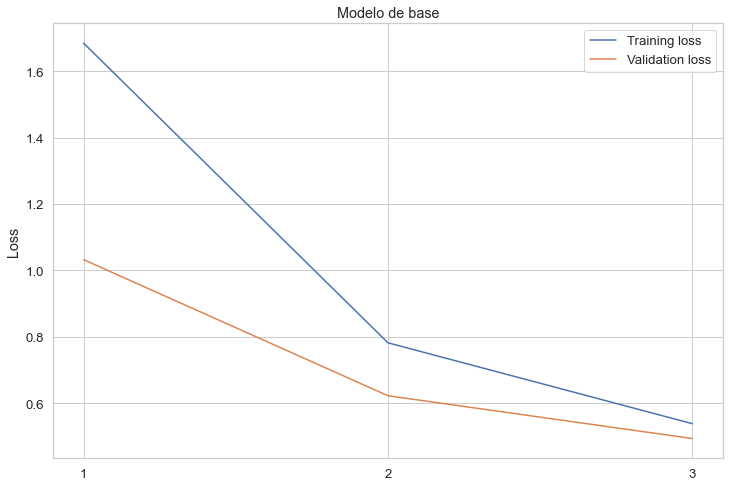

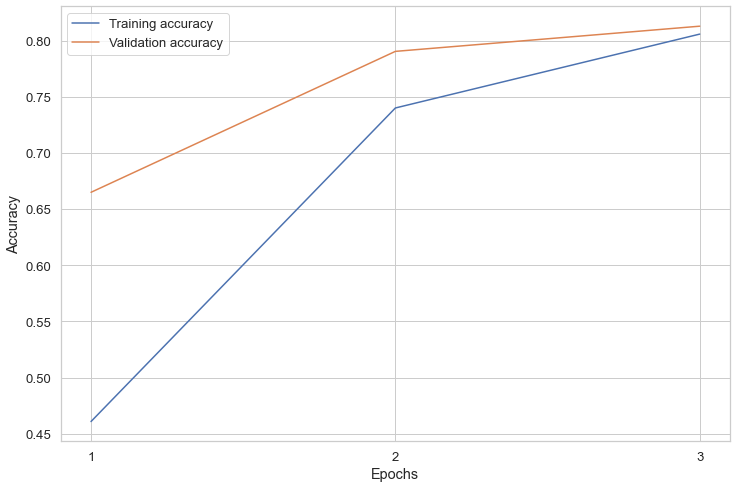

In [50]:
import matplotlib.pyplot as plt
# El atributo `history` contiene un diccionario de métricas por epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,8))
plt.title('Modelo de base')
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.xticks(ticks=epochs)
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'])

plt.figure(figsize=(12,8))
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.xticks(ticks=list(epochs))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy']);

In [61]:
epochs = 3

In [62]:
# Entrenamos el mejor modelo para luego validar en testeo
mejor_modelo.fit(
x=x_train,
y=y_train,
batch_size=batch_size,
epochs=epochs,
verbose=verbose,
callbacks=callbacks_list)

Epoch 1/3
62/62 [==============================] - 2s 30ms/step - loss: 0.4373 - accuracy: 0.8235
Epoch 2/3
62/62 [==============================] - 2s 40ms/step - loss: 0.3802 - accuracy: 0.8350
Epoch 3/3
62/62 [==============================] - 2s 32ms/step - loss: 0.3497 - accuracy: 0.8435


### Testeo

In [63]:
y_pred = mejor_modelo.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [64]:
y_pred.shape, y_test.shape

((13470,), (13470,))

In [65]:
y_pred

array([7, 6, 5, ..., 5, 2, 5], dtype=int64)

In [66]:
y_test

array([7, 6, 5, ..., 4, 2, 5])

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.27      0.10      0.15       471
           1       0.43      0.65      0.52       233
           2       0.98      0.99      0.99      2715
           3       0.22      0.09      0.12       235
           4       0.39      0.21      0.27      1338
           5       0.53      0.75      0.62      2052
           6       0.97      0.98      0.97      3382
           7       0.97      0.97      0.97      3044

    accuracy                           0.82     13470
   macro avg       0.59      0.59      0.58     13470
weighted avg       0.80      0.82      0.80     13470



In [68]:
cm = confusion_matrix(y_test, y_pred)

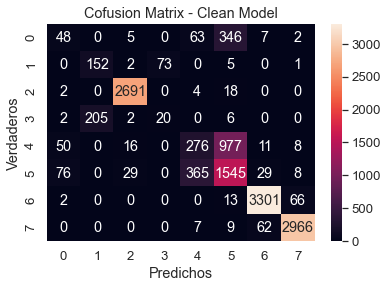

In [69]:
sns.heatmap(cm, annot=True, fmt='.0f')
plt.ylabel('Verdaderos')
plt.title('Cofusion Matrix - Clean Model')
plt.xlabel('Predichos');